In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("traffic_hotspot_prediction.csv")

In [5]:
df

,Latitude,Longitude,City,State,Date,Time,Severity,Temperature_C,Weather,Visibility_km,Road_Type,Lighting,Speed_Limit_kmh
0,40.643696,-74.069726,New York,NY,2024-11-27,09:21:53,Fatal,11.7,Cloudy,2.4,Urban Road,Dusk,59
1,40.750218,-74.120769,New York,NY,2024-07-18,18:34:33,Minor,27.2,Clear,1.9,Residential Street,Dusk,46
2,40.528819,-73.714758,New York,NY,2024-07-27,19:02:58,Fatal,13.6,Clear,9.8,Highway,Daylight,57
3,40.728429,-73.958476,New York,NY,2024-02-09,13:12:29,Minor,13.8,Clear,5.8,Highway,Daylight,64
4,40.602333,-73.703020,New York,NY,2024-05-04,14:04:42,Fatal,6.4,Snow,0.2,Residential Street,Dawn,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.620457,-73.785646,New York,NY,2024-01-18,04:33:07,Major,34.0,Snow,4.3,Residential Street,Dawn,45
996,40.659952,-73.785069,New York,NY,2024-07-29,01:30:26,Major,18.2,Rain,7.4,Intersection,Daylight,58
997,40.616832,-74.062932,New York,NY,2024-03-27,23:10:32,Fatal,12.2,Cloudy,1.9,Highway,Night,40
998,40.552479,-74.036781,New York,NY,2024-01-20,20:08:57,Major,1.4,Cloudy,9.9,Residential Street,Daylight,38


In [11]:
df['Date']=pd.to_datetime(df['Date'])
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['DayOfWeek']=df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

C:\Users\Diyanjali\AppData\Local\Temp\ipykernel_62012\2694654861.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


In [13]:
x=df[['Latitude','Longitude','Hour','DayOfWeek','Month']]

In [17]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [21]:
wcss = [] 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Diyanjali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Diyanjali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Diyanjali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Diyanjali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memor

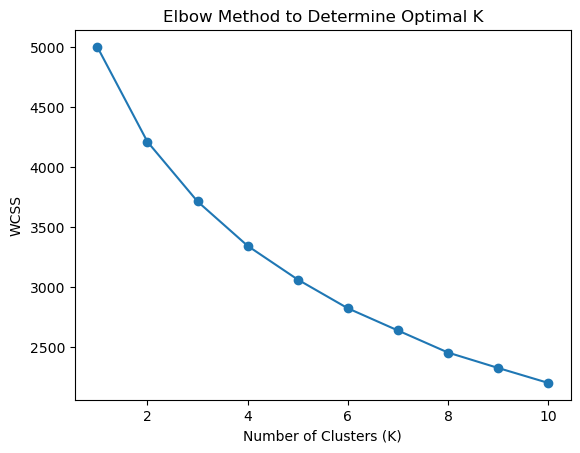

In [23]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

In [27]:
optimal_k=5
kmeans=KMeans(n_clusters=optimal_k,random_state=42,n_init=10)
df['Cluster'] = kmeans.fit_predict(x_scaled)

C:\Users\Diyanjali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [29]:
future_data=np.array([[40.7,-74.0,17,4,3]])
future_data_scaled=scaler.transform(future_data)

C:\Users\Diyanjali\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
predicted_cluster = kmeans.predict(future_data_scaled)
hotspot_location = kmeans.cluster_centers_[predicted_cluster[0]][:2]

In [37]:
print(f"Predicted Future Accident Hotspot:{hotspot_location} ")

Predicted Future Accident Hotspot:[-0.50320457 -0.07304924] 


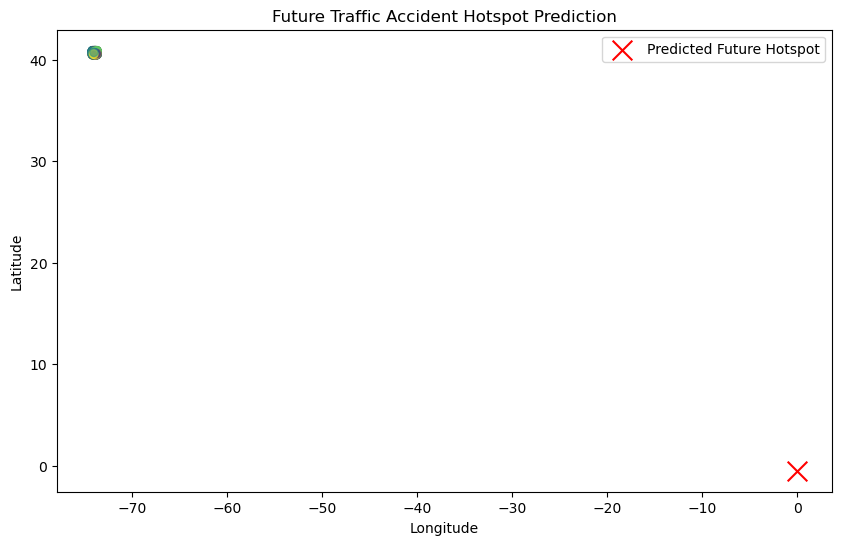

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(df['Longitude'],df['Latitude'],c=df['Cluster'],cmap='viridis',alpha=0.5)
plt.scatter(hotspot_location[1],hotspot_location[0],c='red',marker='x',s=200,label='Predicted Future Hotspot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Future Traffic Accident Hotspot Prediction')
plt.legend()
plt.show()

In [47]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")